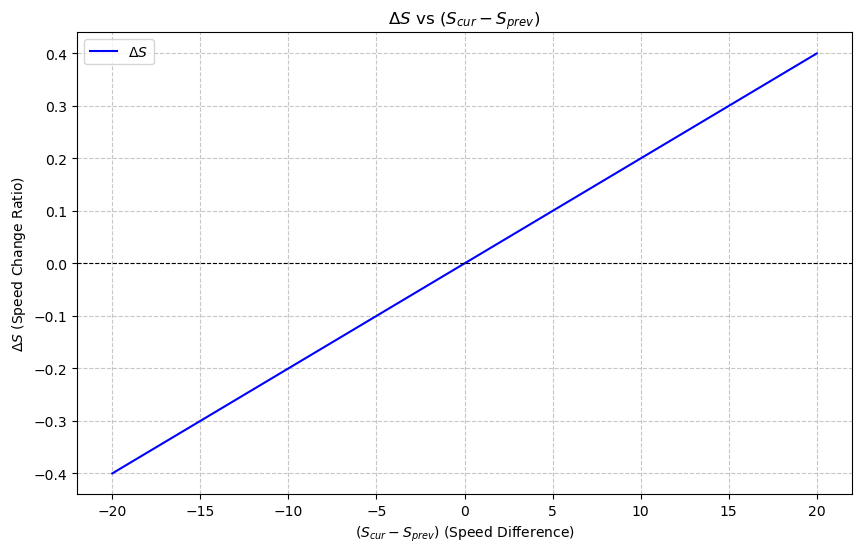

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# ΔS 계산 함수
def delta_S(S_cur, S_prev):
    return (S_cur - S_prev) / S_prev  # 변화 비율 계산

# 설정
S_prev = 50  # 기준 속도 (고정)
delta_speed = np.linspace(-20, 20, 100)  # S_cur - S_prev: -20부터 20까지
S_cur = S_prev + delta_speed  # S_cur 계산

# ΔS 계산
delta_S_values = [delta_S(cur, S_prev) for cur in S_cur]

# ΔS, S_cur, S_prev 변수로 저장
result = {
    "S_cur": S_cur,
    "S_prev": S_prev,
    "Delta_S": delta_S_values
}

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(delta_speed, delta_S_values, label=r'$\Delta S$', color='blue')
plt.title(r'$\Delta S$ vs $(S_{cur} - S_{prev})$')
plt.xlabel(r'$(S_{cur} - S_{prev})$ (Speed Difference)')
plt.ylabel(r'$\Delta S$ (Speed Change Ratio)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # x축 강조
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


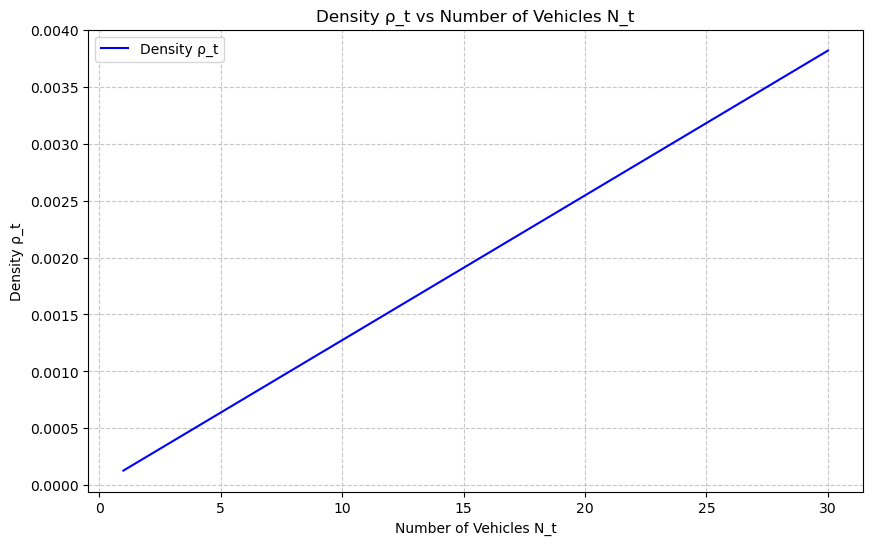

{'N_t': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 'rho_t': array([0.00012732, 0.00025465, 0.00038197, 0.0005093 , 0.00063662,
        0.00076394, 0.00089127, 0.00101859, 0.00114592, 0.00127324,
        0.00140056, 0.00152789, 0.00165521, 0.00178254, 0.00190986,
        0.00203718, 0.00216451, 0.00229183, 0.00241916, 0.00254648,
        0.0026738 , 0.00280113, 0.00292845, 0.00305577, 0.0031831 ,
        0.00331042, 0.00343775, 0.00356507, 0.00369239, 0.00381972]),
 'R': 50}

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 반경 R 설정
R = 50  # 반경
pi = np.pi

# 차량 수 (N_t) 범위 설정
N_t = np.arange(1, 31)  # 차량 수: 1부터 100까지

# 밀도 계산 함수
def calculate_density(N_t, R):
    return N_t / (pi * R**2)

# 밀도 계산
rho_t = calculate_density(N_t, R)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(N_t, rho_t, label="Density ρ_t", color="blue")  # TeX 제거
plt.title("Density ρ_t vs Number of Vehicles N_t")  # TeX 제거
plt.xlabel("Number of Vehicles N_t")
plt.ylabel("Density ρ_t")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

# 결과 변수로 저장
result_density = {
    "N_t": N_t,
    "rho_t": rho_t,
    "R": R
}

result_density  # 결과 반환


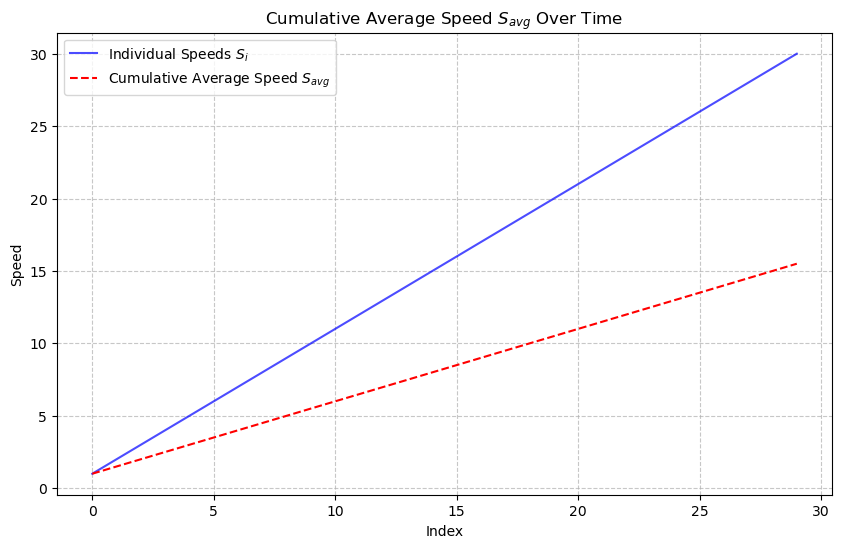

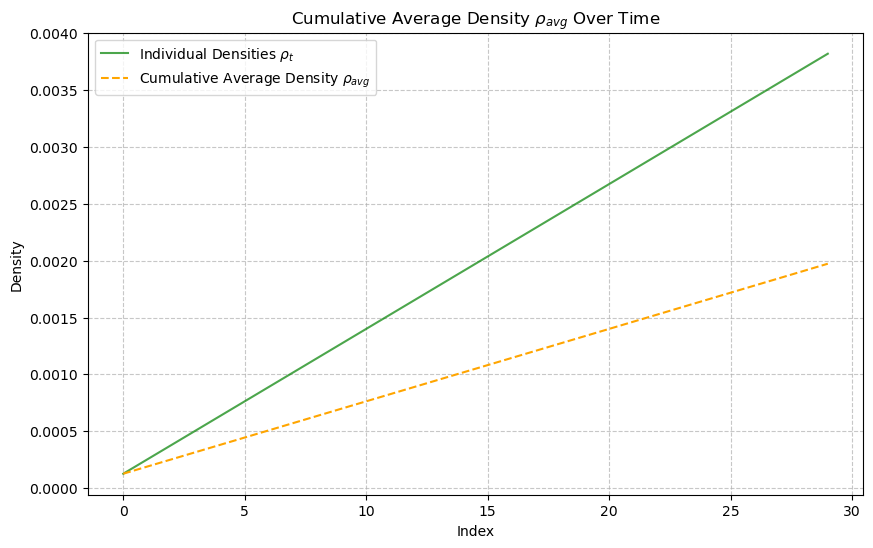

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 누적 평균 계산 함수
def calculate_cumulative_averages(values):
    return [np.mean(values[:i+1]) for i in range(len(values))]

# 이미 저장된 값 활용
S_i = result_density["N_t"]  # 차량 수를 속도로 가정
rho_t = result_density["rho_t"]  # 저장된 밀도 값

# 누적 평균 계산
S_avg_cumulative = calculate_cumulative_averages(S_i)
rho_t_avg_cumulative = calculate_cumulative_averages(rho_t)

# 그래프 1: S_avg
plt.figure(figsize=(10, 6))
plt.plot(S_i, label="Individual Speeds $S_i$", color="blue", alpha=0.7)
plt.plot(S_avg_cumulative, label="Cumulative Average Speed $S_{avg}$", color="red", linestyle="--")
plt.title("Cumulative Average Speed $S_{avg}$ Over Time")
plt.xlabel("Index")
plt.ylabel("Speed")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 그래프 2: rho_avg
plt.figure(figsize=(10, 6))
plt.plot(rho_t, label="Individual Densities $\\rho_t$", color="green", alpha=0.7)
plt.plot(rho_t_avg_cumulative, label="Cumulative Average Density $\\rho_{avg}$", color="orange", linestyle="--")
plt.title("Cumulative Average Density $\\rho_{avg}$ Over Time")
plt.xlabel("Index")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


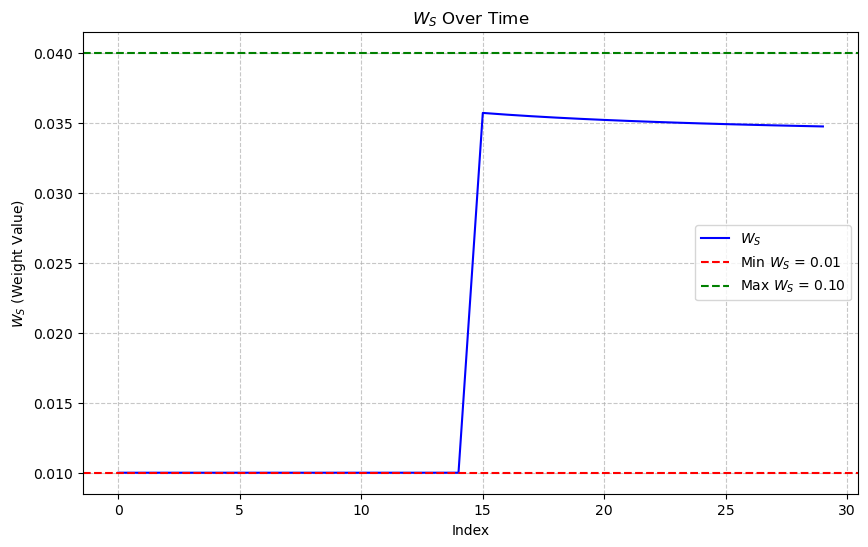

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 필요한 변수 설정
W_base_S = 0.0037  # 기본 속도 가중치
F_S = 0.3          # 민감도 계수
F_change = 0.03    # 보정 계수

# 이미 저장된 값 활용
S_i = result_density["N_t"]  # 차량 수를 속도로 가정
rho_t = result_density["rho_t"]  # 저장된 밀도 값

# S_avg와 ΔS 계산
S_avg = np.mean(S_i)  # 평균 속도
delta_S = [(S_i[i] - S_i[i-1]) / S_i[i-1] if i > 0 else 0 for i in range(len(S_i))]  # ΔS 계산

# W_S 계산 함수
def calculate_W_S(S_cur, S_avg, delta_S):
    term1 = max(-0.03, min((S_cur - S_avg) * F_S, 0.03))
    term2 = max(-0.02, min(delta_S * F_change, 0.02))
    W_S = W_base_S + term1 + term2
    return max(0.01, min(W_S, 0.10))  # 0.01 ≤ W_S ≤ 0.10 제한

# W_S 계산
W_S_values = [calculate_W_S(S_i[i], S_avg, delta_S[i]) for i in range(len(S_i))]

# 결과 저장
result_W_S = {
    "S_cur": S_i,
    "S_avg": S_avg,
    "Delta_S": delta_S,
    "W_S": W_S_values
}

# W_S 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(W_S_values, label="$W_S$", color="blue")
plt.axhline(0.01, color="red", linestyle="--", label="Min $W_S$ = 0.01")
plt.axhline(0.04, color="green", linestyle="--", label="Max $W_S$ = 0.10")

# 그래프 설정
plt.title("$W_S$ Over Time")
plt.xlabel("Index")
plt.ylabel("$W_S$ (Weight Value)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [45]:
rho_t = result_density["rho_t"]
print(rho_t)

[0.00012732 0.00025465 0.00038197 0.0005093  0.00063662 0.00076394
 0.00089127 0.00101859 0.00114592 0.00127324 0.00140056 0.00152789
 0.00165521 0.00178254 0.00190986 0.00203718 0.00216451 0.00229183
 0.00241916 0.00254648 0.0026738  0.00280113 0.00292845 0.00305577
 0.0031831  0.00331042 0.00343775 0.00356507 0.00369239 0.00381972]


In [42]:
rho_t_avg = np.mean(rho_t) 
print(rho_t_avg)

0.001973521294339502


In [60]:
rho_t

array([0.00012732, 0.00025465, 0.00038197, 0.0005093 , 0.00063662,
       0.00076394, 0.00089127, 0.00101859, 0.00114592, 0.00127324,
       0.00140056, 0.00152789, 0.00165521, 0.00178254, 0.00190986,
       0.00203718, 0.00216451, 0.00229183, 0.00241916, 0.00254648,
       0.0026738 , 0.00280113, 0.00292845, 0.00305577, 0.0031831 ,
       0.00331042, 0.00343775, 0.00356507, 0.00369239, 0.00381972])

0.027
0.027000063661977238
0.027000127323954473
0.02700019098593171
0.027000254647908947
0.027000318309886185
0.02700038197186342
0.02700044563384066
0.027000509295817893
0.027000572957795132
0.027000636619772367
0.027000700281749605
0.02700076394372684
0.02700082760570408
0.027000891267681314
0.027000954929658552
0.027001018591635787
0.027001082253613026
0.02700114591559026
0.0270012095775675
0.027001273239544734
0.027001336901521972
0.027001400563499207
0.027001464225476446
0.02700152788745368
0.02700159154943092
0.027001655211408154
0.027001718873385393
0.027001782535362628
0.027001846197339866


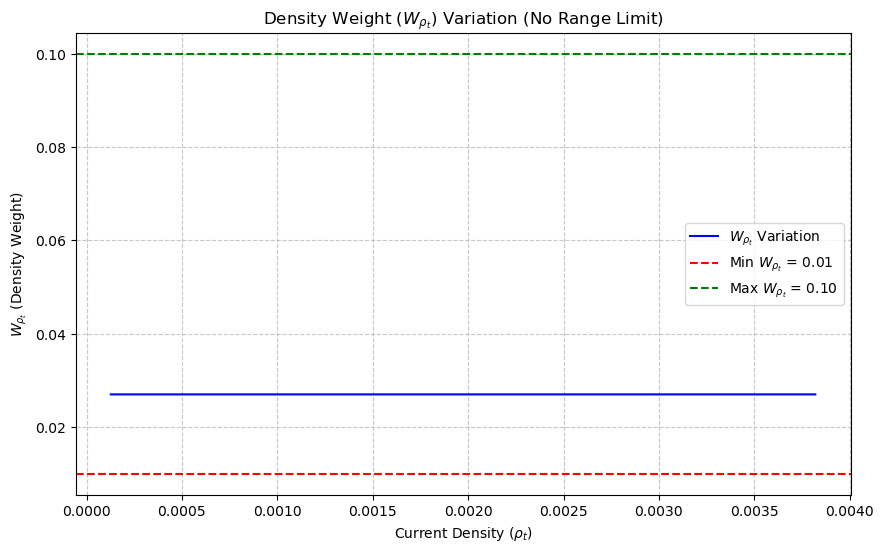

In [63]:
# 필요한 상수 정의
W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = 0.001       # 민감도 조정 계수

# 이미 저장된 반경 내 차량 밀도
rho_t = result_density["rho_t"]

# 네트워크 평균 밀도 리스트 계산
rho_t_avg_list = [np.mean(rho_t[:i+1]) for i in range(len(rho_t))]  # 각 인덱스까지 평균

# W_rho 계산 함수
def calculate_W_rho(rho_t, rho_t_avg):
    term = max(-0.03, min((rho_t - rho_t_avg) * F_rho, 0.03))  # 공식 유지
    W_rho = W_base_rho + term
    print(W_rho)
    return max(0.01, min(W_rho, 0.10))  # 제한 범위 적용

# W_rho 계산
W_rho_values = [calculate_W_rho(rho, rho_avg) for rho, rho_avg in zip(rho_t, rho_t_avg_list)]

# W_rho 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_rho_values, label="$W_{\\rho_t}$ Variation", color="blue")
plt.axhline(0.01, color="red", linestyle="--", label="Min $W_{\\rho_t}$ = 0.01")
plt.axhline(0.10, color="green", linestyle="--", label="Max $W_{\\rho_t}$ = 0.10")

# 그래프 범위 제한 제거
# plt.xlim(min(rho_t), max(rho_t))  # x축 범위 제거
# plt.ylim(0.01, 0.10)  # y축 범위 제거

# 그래프 설정
plt.title("Density Weight ($W_{\\rho_t}$) Variation (No Range Limit)")
plt.xlabel("Current Density ($\\rho_t$)")
plt.ylabel("$W_{\\rho_t}$ (Density Weight)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


In [65]:
rho_t

array([0.00012732, 0.00025465, 0.00038197, 0.0005093 , 0.00063662,
       0.00076394, 0.00089127, 0.00101859, 0.00114592, 0.00127324,
       0.00140056, 0.00152789, 0.00165521, 0.00178254, 0.00190986,
       0.00203718, 0.00216451, 0.00229183, 0.00241916, 0.00254648,
       0.0026738 , 0.00280113, 0.00292845, 0.00305577, 0.0031831 ,
       0.00331042, 0.00343775, 0.00356507, 0.00369239, 0.00381972])

In [64]:
W_rho_values

[0.027,
 0.027000063661977238,
 0.027000127323954473,
 0.02700019098593171,
 0.027000254647908947,
 0.027000318309886185,
 0.02700038197186342,
 0.02700044563384066,
 0.027000509295817893,
 0.027000572957795132,
 0.027000636619772367,
 0.027000700281749605,
 0.02700076394372684,
 0.02700082760570408,
 0.027000891267681314,
 0.027000954929658552,
 0.027001018591635787,
 0.027001082253613026,
 0.02700114591559026,
 0.0270012095775675,
 0.027001273239544734,
 0.027001336901521972,
 0.027001400563499207,
 0.027001464225476446,
 0.02700152788745368,
 0.02700159154943092,
 0.027001655211408154,
 0.027001718873385393,
 0.027001782535362628,
 0.027001846197339866]

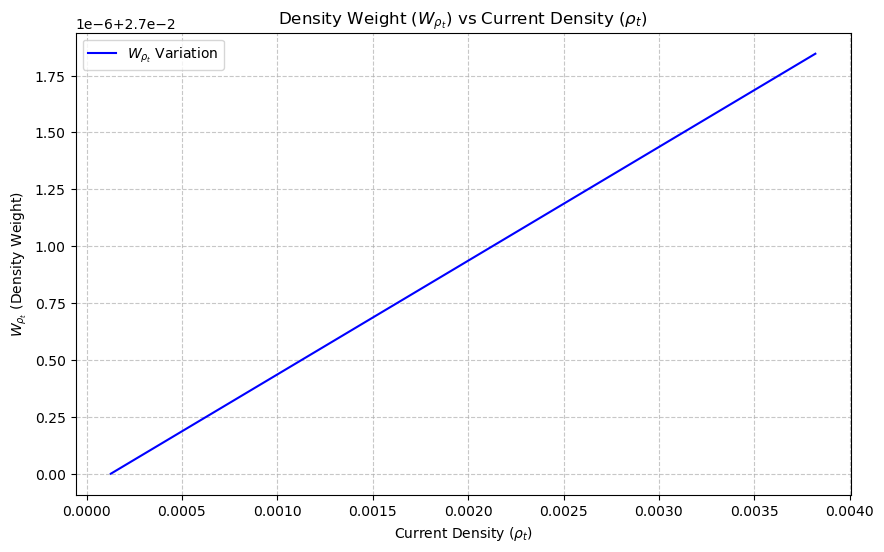

In [68]:
# rho_t와 W_rho_values를 사용하여 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_rho_values, label="$W_{\\rho_t}$ Variation", color="blue")

# x축, y축 범위 설정을 하지 않음 (완전히 자동 설정)
plt.title("Density Weight ($W_{\\rho_t}$) vs Current Density ($\\rho_t$)")
plt.xlabel("Current Density ($\\rho_t$)")
plt.ylabel("$W_{\\rho_t}$ (Density Weight)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
